# Sequential Data transformations

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from Modules import *
sns.set()
%matplotlib inline

In [2]:
df, y = read_data('../default_of_credit_card_clients.xls')
df = proc_cat_df(df)


df.head()

LIMIT_BAL  AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
1      20000   24      2      2     -1     -1     -2     -2       3913   
2     120000   26     -1      2      0      0      0      2       2682   
3      90000   34      0      0      0      0      0      0      29239   
4      50000   37      0      0      0      0      0      0      46990   
5      50000   57     -1      0     -1      0      0      0       8617   

   BILL_AMT2          ...           PAY_AMT5  PAY_AMT6  Y  SEX_Female  \
1       3102          ...                  0         0  1           1   
2       1725          ...                  0      2000  1           1   
3      14027          ...               1000      5000  0           1   
4      48233          ...               1069      1000  0           1   
5       5670          ...                689       679  0           0   

   SEX_Male  EDUCATION_Graduate School  EDUCATION_Other  EDUCATION_University  \
1         0                          0                0                     1   
2         0                          0                0                     1   
3         0                          0                0                     1   
4         0                          0                0                     1   
5         1                          0                0                     1   

   MARRIAGE_Married  MARRIAGE_Non-married  
1                 1                     0  
2                 0                     1  
3                 0                     1  
4                 1                     0  
5                 1                     0  

[5 rows x 28 columns]

In [3]:
df_copy =  df.iloc[:, 2:20].copy()
df_copy.head(10)

PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  \
1       2      2     -1     -1     -2     -2       3913       3102        689   
2      -1      2      0      0      0      2       2682       1725       2682   
3       0      0      0      0      0      0      29239      14027      13559   
4       0      0      0      0      0      0      46990      48233      49291   
5      -1      0     -1      0      0      0       8617       5670      35835   
6       0      0      0      0      0      0      64400      57069      57608   
7       0      0      0      0      0      0     367965     412023     445007   
8       0     -1     -1      0      0     -1      11876        380        601   
9       0      0      2      0      0      0      11285      14096      12108   
10     -2     -2     -2     -2     -1     -1          0          0          0   

    BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
1           0          0          0         0       689         0         0   
2        3272       3455       3261         0      1000      1000      1000   
3       14331      14948      15549      1518      1500      1000      1000   
4       28314      28959      29547      2000      2019      1200      1100   
5       20940      19146      19131      2000     36681     10000      9000   
6       19394      19619      20024      2500      1815       657      1000   
7      542653     483003     473944     55000     40000     38000     20239   
8         221       -159        567       380       601         0       581   
9       12211      11793       3719      3329         0       432      1000   
10          0      13007      13912         0         0         0     13007   

    PAY_AMT5  PAY_AMT6  
1          0         0  
2          0      2000  
3       1000      5000  
4       1069      1000  
5        689       679  
6       1000       800  
7      13750     13770  
8       1687      1542  
9       1000      1000  
10      1122         0

In [4]:
##lets create a ratio to investigate what percentage of the bill clients are paying for the 6 months
##Add 0.0000000000000000000000000001 to each bill amount to get rid of division by 0
df["PAY_AMT1'"] = df.PAY_AMT1 / (df.BILL_AMT1+0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001)
df["PAY_AMT2'"] = df.PAY_AMT2 / (df.BILL_AMT2+0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001)
df["PAY_AMT3'"] = df.PAY_AMT3 / (df.BILL_AMT3+0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001)
df["PAY_AMT4'"] = df.PAY_AMT4 / (df.BILL_AMT4+0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001)
df["PAY_AMT5'"] = df.PAY_AMT5 / (df.BILL_AMT5+0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001)
df["PAY_AMT6'"] = df.PAY_AMT6 / (df.BILL_AMT6+0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001)

In [5]:
df.tail()

LIMIT_BAL  AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
29996     220000   39      0      0      0      0      0      0     188948   
29997     150000   43     -1     -1     -1     -1      0      0       1683   
29998      30000   37      4      3      2     -1      0      0       3565   
29999      80000   41      1     -1      0      0      0     -1      -1645   
30000      50000   46      0      0      0      0      0      0      47929   

       BILL_AMT2    ...      EDUCATION_Other  EDUCATION_University  \
29996     192815    ...                    1                     0   
29997       1828    ...                    1                     0   
29998       3356    ...                    0                     1   
29999      78379    ...                    1                     0   
30000      48905    ...                    0                     1   

       MARRIAGE_Married  MARRIAGE_Non-married  PAY_AMT1'  PAY_AMT2'  \
29996                 1                     0   0.044986   0.103726   
29997                 0                     1   1.091503   1.928884   
29998                 0                     1   0.000000   0.000000   
29999                 1                     0 -52.218845   0.043494   
30000                 1                     0   0.043356   0.036806   

       PAY_AMT3'  PAY_AMT4'  PAY_AMT5'  PAY_AMT6'  
29996   0.024011   0.034623   0.160067   0.062578  
29997   2.569389   0.014367   0.000000   0.000000  
29998   7.976795   0.201169   0.097172   0.160149  
29999   0.015438   0.036495   4.467651   0.036858  
30000   0.028736   0.027371   0.030838   0.065304  

[5 rows x 34 columns]

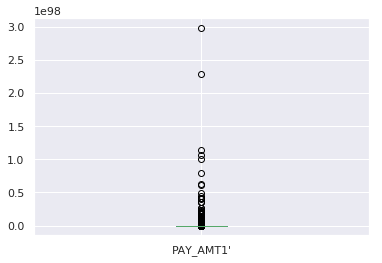

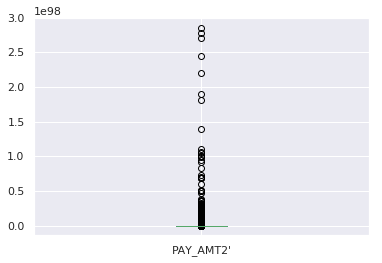

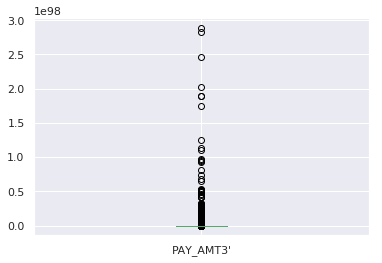

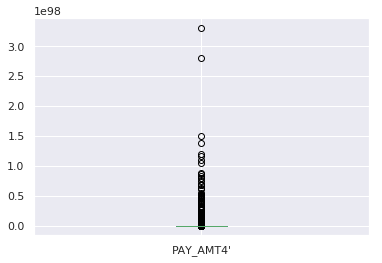

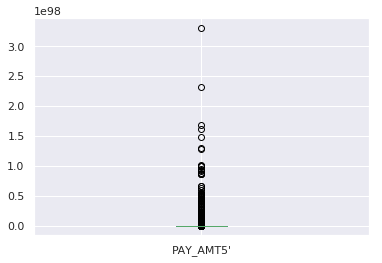

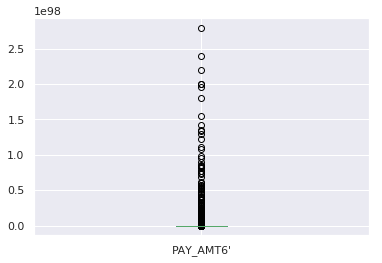

In [6]:
for column in df.iloc[:,-6:]:
    plt.figure()
    df.boxplot([column])

Now that we have the ratios, we are going to recode them. if the ratio is increasing across the months we will give them a 1, 0 if is the same or decreasing.


In [7]:
df.loc[df["PAY_AMT1'"] < df["PAY_AMT2'"], 'Increasing1'] = (1*(5/5)) 
df.loc[df["PAY_AMT1'"] >= df["PAY_AMT2'"], 'Increasing1'] = '0' 

In [8]:
df.loc[df["PAY_AMT2'"] < df["PAY_AMT3'"], 'Increasing2'] = (1*(4/5))
df.loc[df["PAY_AMT2'"] >= df["PAY_AMT3'"], 'Increasing2'] = '0' 

In [9]:
df.loc[df["PAY_AMT3'"] < df["PAY_AMT4'"], 'Increasing3'] = (1*(3/5))
df.loc[df["PAY_AMT3'"] >= df["PAY_AMT4'"], 'Increasing3'] = '0' 

In [10]:
df.loc[df["PAY_AMT4'"] < df["PAY_AMT5'"], 'Increasing4'] = (1*(2/5)) 
df.loc[df["PAY_AMT4'"] >= df["PAY_AMT5'"], 'Increasing4'] = '0' 

In [11]:
df.loc[df["PAY_AMT5'"] < df["PAY_AMT6'"], 'Increasing5'] = (1*(1/5)) 
df.loc[df["PAY_AMT5'"] >= df["PAY_AMT6'"], 'Increasing5'] = '0' 

In [12]:
df.iloc[:,-12:].head()

MARRIAGE_Non-married  PAY_AMT1'  PAY_AMT2'  PAY_AMT3'  PAY_AMT4'  \
1                     0   0.000000   0.222115   0.000000   0.000000   
2                     1   0.000000   0.579710   0.372856   0.305623   
3                     1   0.051917   0.106937   0.073752   0.069779   
4                     0   0.042562   0.041859   0.024345   0.038850   
5                     0   0.232099   6.469312   0.279057   0.429799   

   PAY_AMT5'  PAY_AMT6' Increasing1 Increasing2 Increasing3 Increasing4  \
1   0.000000   0.000000           1           0           0           0   
2   0.000000   0.613309           1           0           0           0   
3   0.066899   0.321564           1           0           0           0   
4   0.036914   0.033844           0           0         0.6           0   
5   0.035987   0.035492           1           0         0.6           0   

  Increasing5  
1           0  
2         0.2  
3         0.2  
4           0  
5           0

In [13]:
df=df.drop([ "PAY_AMT1'", "PAY_AMT2'", "PAY_AMT3'", "PAY_AMT4'", "PAY_AMT5'", "PAY_AMT6'"], axis=1)